In [1]:
from TTreeHnBrowser import *

Welcome to JupyROOT 6.13/03


In [2]:
treeBrowser = TTreeHnBrowser()  

In [ ]:
tree=ROOT.AliTreePlayer.LoadTrees("cat performance.list","(his.*)","xxx",".*","","")
treeBrowser.initTree(tree)

In [4]:
#tree=ROOT.AliTreePlayer.LoadTrees("cat mapLong.list","his.*_proj_0_1Dist","$#",".*","","")
#treeBrowser.initTree(tree)

In [5]:
#treeBrowser.boxAll

In [6]:
treeBrowser.initTree(tree)

0

In [7]:
treeBrowser.boxAll

VkJveChjaGlsZHJlbj0oSEJveChjaGlsZHJlbj0oVGV4dCh2YWx1ZT11Jy4qJywgZGVzY3JpcHRpb249dSdGcmllbmQgUmVnRXhwJyksIFRleHQodmFsdWU9dScuKicsIGRlc2NyaXB0aW9uPXXigKY=


In [8]:
treeBrowser.drawVarArray.addVariable("xxx")
treeBrowser.drawVarArray.fDrawVarWidgets
treeBrowser.sliderArray.addSlider("xxx(1:10:1)")

In [9]:
print(treeBrowser.sliderArray)



<TTreeHnBrowser.TSliderArray instance at 0x7f94ecc5ca28>


In [10]:
print(treeBrowser.drawQueryBox.children[1])

Button(description=u'Add query', style=ButtonStyle(), tooltip=u'Add/test query')


In [11]:
print(treeBrowser.drawSlider)

Text(value=u'', description=u'Slider', layout=Layout(width=u'66%'))


In [12]:
print(treeBrowser.sliderWidgets)

VBox(layout=Layout(width=u'100%'))


In [13]:
ROOT.AliParser.ExtractBetween('hisITSOnElectronDist.entries (10:100:0.1)',' (',')')[0].Data()

'10:100:0.1'

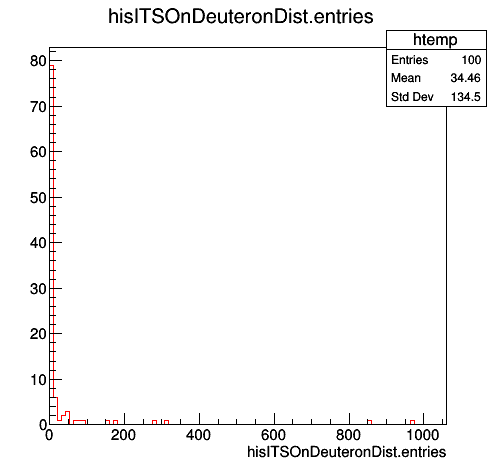

In [14]:
c=ROOT.TCanvas("","",500,500)
tree.Draw("hisITSOnDeuteronDist.entries","","",100)
c.Draw();